# Multinomial Naive Bayes: Final model

This notebook features the most interesting model using MultinomialNB. 

In [1]:
%run notebook_utils.py

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

%cd ..
from langid import WrappedVectorizer, sanitize, np_sanitize
%cd - 

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


In [2]:
import matplotlib
# set big font in plots
SMALL_SIZE = 18
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [3]:
# load data
X_train, X_test, y_train, y_test = load_split_data()
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

# Model training

In [4]:
# train the model
pipe = Pipeline(steps=[
    ('vec', CountVectorizer(analyzer='char', ngram_range=(1, 3), max_features=10000)),
    ('clf', MultinomialNB())
])

pipe.fit(np_sanitize(X_train), y_train)

Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# Model evaluation

TEST SET
accuracy: 0.9855

             precision    recall  f1-score   support

         de     0.9660    0.9918    0.9787      1462
         fr     0.9952    0.9966    0.9959      1468
         en     0.9840    0.9967    0.9903      1538
         it     0.9893    0.9973    0.9933      1482
         sg     0.9941    0.9437    0.9682      1438

avg / total     0.9857    0.9855    0.9854      7388



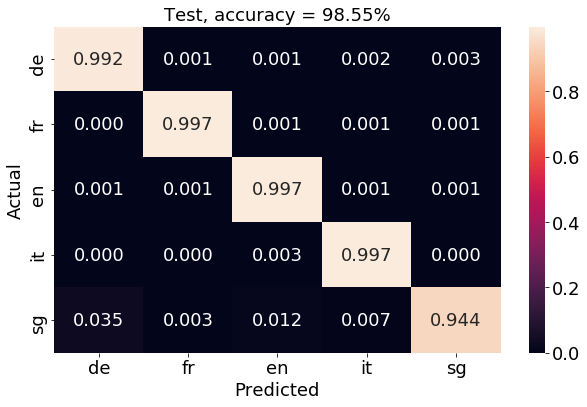

SMS RECALL
total samples    10692
total errors       386 (3.61%)
---------------------------------
languages detected
    de      294
    fr       16
    en       47
    it       29
    sg    10306


SMS ANY
accuracy: 0.9522

             precision    recall  f1-score   support

         de     0.9577    0.9005    0.9282       201
         fr     0.9850    0.9801    0.9825       201
         en     0.9946    0.9154    0.9534       201
         it     0.9805    1.0000    0.9901       201
         sg     0.8584    0.9652    0.9087       201

avg / total     0.9552    0.9522    0.9526      1005



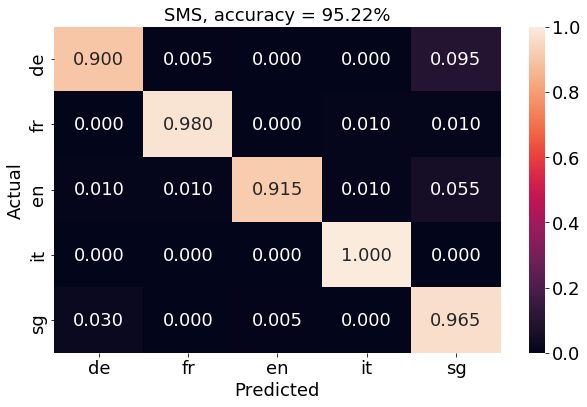



VALIDATION SET
accuracy: 0.9829

             precision    recall  f1-score   support

         de     0.9368    0.9923    0.9638      2613
         fr     0.9985    0.9958    0.9971      2613
         en     0.9916    0.9989    0.9952      2613
         it     0.9962    0.9969    0.9966      2613
         sg     0.9947    0.9303    0.9614      2613

avg / total     0.9835    0.9829    0.9828     13065



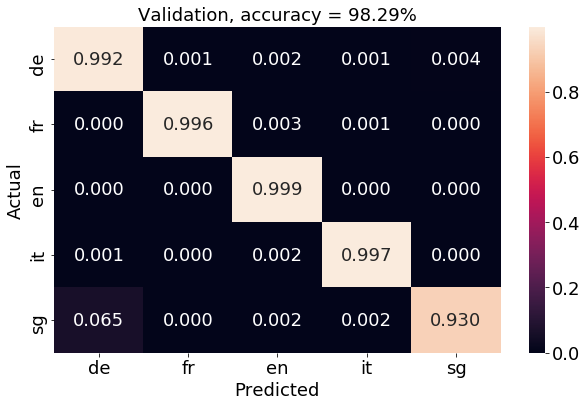

In [5]:
print("TEST SET")
print("========")
y_pred = pipe.predict(np_sanitize(X_test))
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True, 
    title="Test, accuracy = %.2f%%" % (metrics.accuracy_score(y_test, y_pred) * 100))
print("SMS RECALL")
print("==========")

test_recall_with_sms(pipe)

print("\n\nSMS ANY")
print("==========")
y_sms_any_pred = pipe.predict(np_sanitize(sms_any_X))
print_results(sms_any_y, y_sms_any_pred)
plot_confusion_matrix(sms_any_y, y_sms_any_pred, normalised=True,
    title="SMS, accuracy = %.2f%%" % (metrics.accuracy_score(sms_any_y, y_sms_any_pred) * 100))

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = pipe.predict(np_sanitize(X_valid))
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True,
    title="Validation, accuracy = %.2f%%" % (metrics.accuracy_score(y_valid, y_valid_pred) * 100))

In [6]:
import pickle

filename = "Sanitize-CountVec_feat10000_1-3grams-MultinomialNB.pickle"
with open(filename, 'wb') as f: pickle.dump(pipe, f)